# K-means Cluster 

# Pham Van Hong - 11201638 

# Problem 1 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
from sklearn import datasets
from sklearn.decomposition import PCA

Steps:
+ Khởi tạo K điểm dữ liệu trong bộ dữ liệu và tạm thời coi nó là center
+ Center của mỗi điểm dữ liệu được xác định là 1 trong cluster gần nó nhất
+ Tính toán lại vị trí của center
+ Lặp lại bước 2, 3 cho đến khi vị trí center k thay đổi

In [2]:
means = np.random.randint(low = 1, high = 20, size = (4, 2))

In [3]:
means

array([[ 3,  9],
       [12,  3],
       [ 9,  8],
       [13, 16]])

In [4]:
n_samples = 500
n_cluster = 3
cov = [[1, 0], [0, 1]]

In [5]:
X0 = np.random.multivariate_normal(means[0], cov, n_samples)
X1 = np.random.multivariate_normal(means[1], cov, n_samples)
X2 = np.random.multivariate_normal(means[2], cov, n_samples)
X = np.concatenate((X0, X1, X2), axis = 0)

In [6]:
def display(X, label):
    K = np.amax(label) + 1
    X0 = X[label == 0, :]
    X1 = X[label == 1, :]
    X2 = X[label == 2, :]
    
    plt.plot(X0[:, 0], X0[:, 1], 'b^', markersize = 5, alpha = .8)
    plt.plot(X1[:, 0], X1[:, 1], 'go', markersize = 5, alpha = .8)
    plt.plot(X2[:, 0], X2[:, 1], 'rs', markersize = 5, alpha = .8)

    plt.axis('equal')
    plt.plot()
    plt.show()

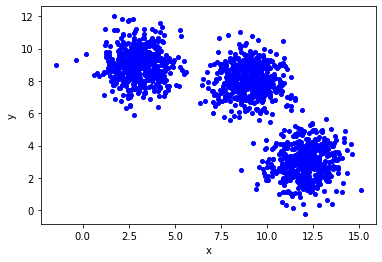

In [7]:
plt.xlabel('x')
plt.ylabel('y')
plt.plot(X[:,0], X[:, 1], 'bo', markersize = 4)
plt.plot()
plt.show()

In [8]:
def creat_center(X, n_cluster):
    # tạo centers ban đầu
  	 return X[np.random.choice(X.shape[0], n_cluster, replace=False)]

In [9]:
def k_means_predict(X, centers):
    # dự đoán nhãn mới cho các điểm khi biết các centers
    D = cdist(X, centers)
    return np.argmin(D, axis = 1)

In [10]:
def update_centers(X, labels, K):
    # update các centers mới 
    centers = np.zeros((K, X.shape[1]))
    for k in range(K):
        Xk = X[labels == k, :]
        centers[k,:] = np.mean(Xk, axis = 0)
    return centers

In [11]:
def check_conditions(centers, new_centers):
    # kiểm tra điều kiện dừng của thuật toán
    return (set([tuple(a) for a in centers]) == set([tuple(a) for a in new_centers]))

In [12]:
def kmeans(X, K):
    centers = [creat_center(X, K)]
    labels = []
    it = 0 
    while True:
        labels.append(k_means_predict(X, centers[-1]))
        new_centers = update_centers(X, labels[-1], K)
        if check_conditions(centers[-1], new_centers):
            break
        centers.append(new_centers)
        it += 1
    return (centers, labels, it)

Centers found by our algorithm:
[[ 3.02366788  9.00830368]
 [12.04922573  2.962088  ]
 [ 9.00277064  8.04532718]]


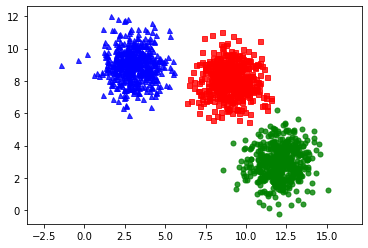

In [13]:
(centers, labels, it) = kmeans(X, n_cluster)
print('Centers found by our algorithm:')
print(centers[-1])

display(X, labels[-1])

# Problem 2

iris data

In [14]:
iris = datasets.load_iris()

In [15]:
iris_reduced = PCA(n_components = 2).fit_transform(iris.data)

In [ ]:
iris_reduced

In [21]:
kmean_iris = kmeans(X = iris_reduced, K = 3)

Centers found by our algorithm:
[[-2.57133688  0.45835798]
 [ 1.40613269 -0.05734426]
 [-2.39572537 -0.41647304]]


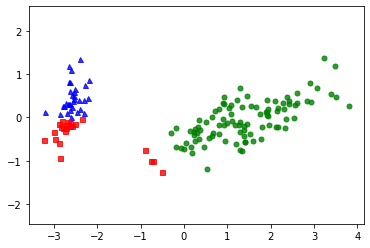

In [31]:
(centers, labels, it) = kmeans(iris_reduced, 3)
print('Centers found by our algorithm:')
print(centers[-1])
display(iris_reduced, labels[-1])

Centers found by our algorithm:
[[ 1.38640101 -0.06980433]
 [-2.53737542  0.12775509]]


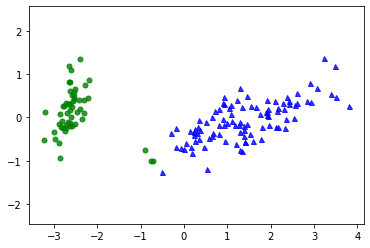

In [37]:
(centers, labels, it) = kmeans(iris_reduced, 2)
print('Centers found by our algorithm:')
print(centers[-1])
display(iris_reduced, labels[-1])

diabetes dataset

In [42]:
diabetes = datasets.load_diabetes()
diabetes_reduced = PCA(n_components = 2).fit_transform(diabetes.data)

In [45]:
kmean_diabetes = kmeans(X = diabetes_reduced, K = 2)
(centers, labels, it) = kmeans(diabetes_reduced, 2)
print('Centers found by our algorithm:')
print(centers[-1])
display(iris_reduced, labels[-1])

Centers found by our algorithm:
[[ 0.07717677 -0.00366271]
 [-0.08222571  0.00390232]]


IndexError: boolean index did not match indexed array along dimension 0; dimension is 150 but corresponding boolean dimension is 442

# Problem 3

In [ ]:
# Calculate the within-cluster sum of squares for each number of clusters
k_values = range(1, 11)
sum_of_squared_distances = []
for k in k_values:
    _, cluster_assignments = kmeans(X1, n_cluster)
    sum_of_squared_distances.append(sum([np.linalg.norm(X1[i] - centroids[cluster_assignments[i]]) ** 2 for i in range(len(X1))]))

# Plot the within-cluster sum of squares against the number of clusters
plt.plot(k_values, sum_of_squared_distances, marker='o')
plt.xlabel("Number of clusters")
plt.ylabel("Within-cluster sum of squares")
plt.show()